# TP6 - Clasificador de imágenes con perceptrón

Imports necesarios para ejecutar el trabajo

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping
import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()
    
    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

In [3]:
verbose = True

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.np_utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]


Loading MNIST dataset...
11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [4]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.7152 - accuracy: 0.8245 - val_loss: 0.4150 - val_accuracy: 0.8895
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.9006 - val_loss: 0.3437 - val_accuracy: 0.9073
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.9111 - val_loss: 0.3164 - val_accuracy: 0.9120
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.9161 - val_loss: 0.3034 - val_accuracy: 0.9147
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2917 - accuracy: 0.9191 - val_loss: 0.2953 - val_accuracy: 0.9157
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9214 - val_loss: 0.2882 - val_accuracy: 0.9185
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.9240 - val_loss: 0.2868 - val_accuracy: 0.9198
Epoch 

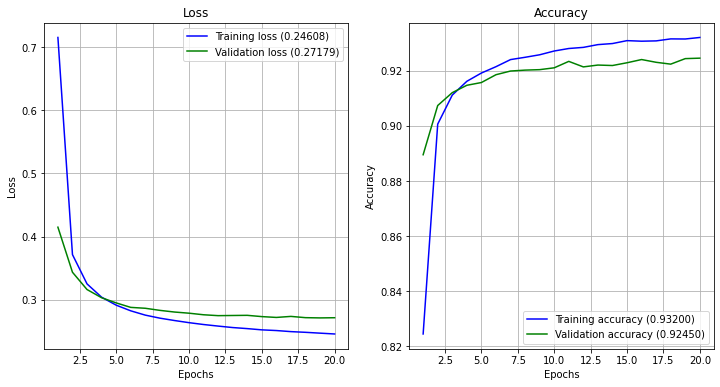

In [5]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

Preguntas a responder de la celda anterior

**1 - ¿Qué representan los parámetros batch_size y epochs? Respuesta (dos líneas max).**

batch_size -> Número de muestras por actualización de gradiente, es decir número de muestras que se propagarán a través de la red.

epochs -> número de epochs significa cuántas veces pasas por el conjunto de entrenamiento.

**2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.**

En el primer gráfico se ve la evolución en cada epoch de la Loss para los dos conjuntos de datos.
Se observa como en los datos de training en los primeros epochs, loss es muy alta, al contrario de en los datos de validation, gracias a haber realizado previamente los de training. 

En el segundo gráfico se presenta la Accuracy obtenida en cada epoch, tanto para los datos de entrenamiento (Training) como los de validación (validation). Se observa en este caso algo similar al otro gráfico, en los datos de training comienza con un valor de accuracy muy bajo en los primeros epochs, pero los de validation comienzan con valores más altos.

Evaluación de la red

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  93.30%
Accuracy test:   92.65%
Confusion matrix, without normalization


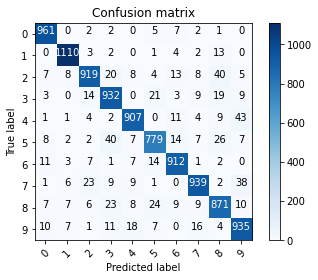

In [7]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

Preguntas a responder de la celda anterior

**1 - Explica la gráfica que se muestra**

Las filas representan las categorías reales y las columnas representan las categorías predichas. Cada celda cruzada representa la cuenta de la frecuencia de cada predicción comparado con el número real. 

Por ejemplo, si se observa la columna 0, fila 0, quiere decir que se ha predicho 959 que un 0 es un 0. Columna 0, fila 9, quiere decir que se ha predicho 8 veces un 0 cuando realmente es un 9. 

-



**Trabajo práctico**: incluye a continuación las secciones de código para probar las diferentes redes. 
No incluyas una sección para cada red que pruebes. El notebook que entregues deberá incluir:


1.   La mejor red obtenida para el caso de una capa
2.   La mejor red obtenida para el caso de dos capas
3.   La mejor red obtenida para el caso de tres capas
4.   Ejemplo de red en la que se produzca sobreajuste al entrenar
5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste
6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.
7.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

**1.   La mejor red obtenida para el caso de una capa**

En el apartado 6 se pueden ver las distintas pruebas que se han realizado para las redes de una capa.

La mejor es Perceptrón con algoritmo RMSprop y función de salida sigmoidal para accuracy test. (Accuracy train es mejor con softmax pero peor en accuracy test y lo que intersa son los datos de validación)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.6275 - accuracy: 0.8465 - val_loss: 0.3682 - val_accuracy: 0.8970
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.9060 - val_loss: 0.3186 - val_accuracy: 0.9108
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3055 - accuracy: 0.9153 - val_loss: 0.3036 - val_accuracy: 0.9162
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.9183 - val_loss: 0.2952 - val_accuracy: 0.9173
Epoch 5/20
4

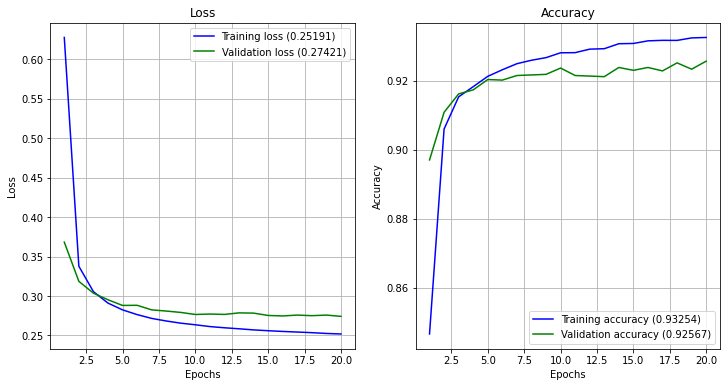

Accuracy train:  93.28%
Accuracy test:   92.73%
Confusion matrix, without normalization


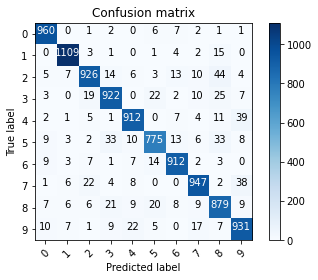

In [8]:
# Perceptron de un solo nivel
model_1 = Sequential()
model_1.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model_1.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=['accuracy'])
model_1.summary()

#Gráficas
t0 = time.perf_counter()
history_1 = model_1.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time_1 = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time_1, 's') )
plot_history(history_1)

# Evaluar la red
train_score_1 = model_1.evaluate(x_train, y_train, verbose=0)
test_score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_1[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_1[1], '%'))

y_pred_1 = model_1.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred_1, normalize=False)

**2.   La mejor red obtenida para el caso de dos capas**

Todas las redes ocultas serán con función de activación ReLu, ya que es la más usada en la actualidad y funciona bien hasta con redes profundas

Como se verá en la tabla del apartado 6, se prueban distintas configuraciones. Se elige finalmente una red con 50 neuronas en capa oculta y dropout aplicado. (Se explica mejor en el apartado 6 junto con la tabla).


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.5739 - accuracy: 0.8320 - val_loss: 0.2814 - val_accuracy: 0.9192
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2993 - accuracy: 0.9135 - val_loss: 0.2131 - val_accuracy: 0.9380
Epoch 3/20
422/422 [==========

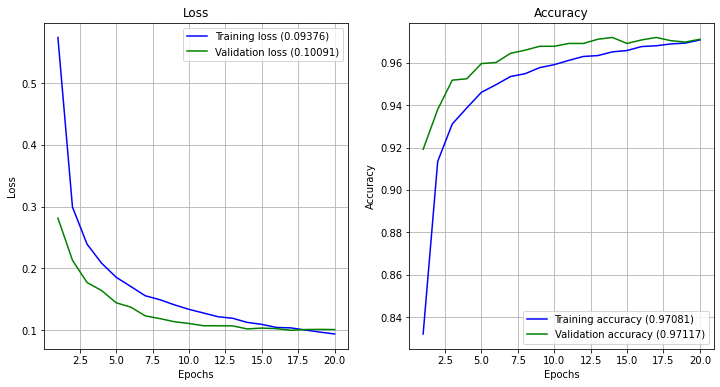

Accuracy train:  98.46%
Accuracy test:   97.04%
Confusion matrix, without normalization


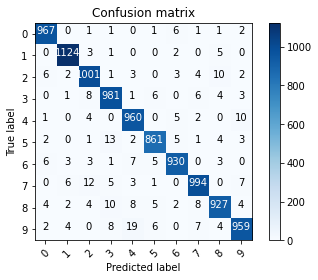

In [9]:
# Perceptron de dos niveles
model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_shape=(num_pixels,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='sigmoid'))
model_2.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model_2.summary()

#Gráficas
t0 = time.perf_counter()
history_2 = model_2.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time_2 = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time_2, 's') )
plot_history(history_2)

# Evaluar la red
train_score_2 = model_2.evaluate(x_train, y_train, verbose=0)
test_score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_2[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_2[1], '%'))

y_pred_2 = model_2.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred_2, normalize=False)

**3.   La mejor red obtenida para el caso de tres capas**

Como en el caso de dos capas, para tres capas se han probado distintas configuraciones, ya conociendo un poco el comportamiento de una y dos capas. Al final se ha elegido como mejor red, la de dos capas con primera capa oculta con mayor número de neuronas que la segunda capa oculta, y finalmente la capa de salida la que menos neuronas tiene, ya que se ve que funciona mejor. Además de escoger la que soluciona el sobreajuste por mejores resultados. 

Se puede ver en la tabla del apartado 6 las distintas pruebas.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================

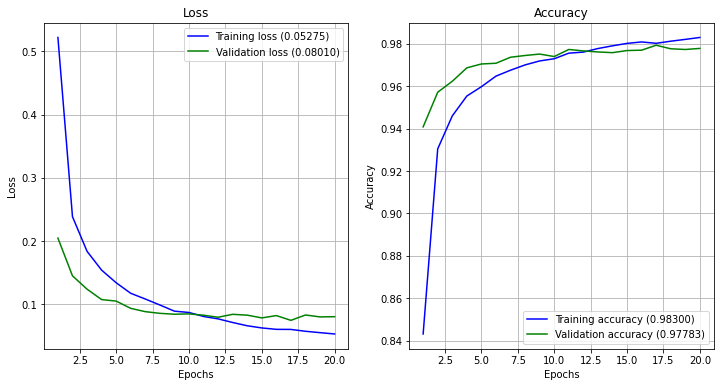

Accuracy train:  99.38%
Accuracy test:   97.84%
Confusion matrix, without normalization


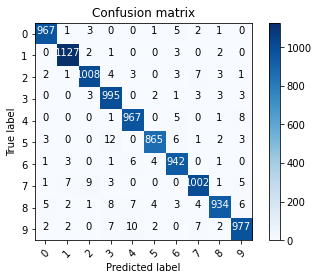

In [10]:
# Perceptron de dos niveles
model_3 = Sequential()
model_3.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(50, activation='relu', input_shape=(num_pixels,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='sigmoid'))
model_3.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model_3.summary()

#Gráficas
t0 = time.perf_counter()
history_3 = model_3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time_3 = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time_3, 's') )
plot_history(history_3)

# Evaluar la red
train_score_3 = model_3.evaluate(x_train, y_train, verbose=0)
test_score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score_3[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score_3[1], '%'))

y_pred_3 = model_3.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred_3, normalize=False)

**4.   Ejemplo de red en la que se produzca sobreajuste al entrenar**

Tras buscar en distintas fuentes cómo detectar el sobreajuste, en resumen:  

- Para un modelo que está sobreajustado, tenemos un accuracy de conjunto de entrenamiento perfecto/casi perfecto, mientras que un accuracy de validación/test deficiente. 

- Existe sobreajuste si el accuracy va acendiendo progresivamente y hasta en la gráfica que mostramos con los datos de entrenamiento, mientras que con los datos de validación/test conforme avanza el análisis llega un momento en deja de mejorar durante la progresión y queda más estancado.

Para valorar cuando hay sobreajuste he valorado sobre todo el análisis de la gráfica, además de controlar que accuracy de entrenamiento no fuese practicamente perfecto junto con que la diferencia entre accuracy de train y test no fuese demasiado grande.
Esto lo he aplicado tanto para dar el ejemplo que voy a poner a continuación como para valorar las redes de todas las pruebas realizadas.


Se puede producir sobreajuste si hay un gran número de neuronas en la predicción o si el entrenamiento es demasiado largo. Por esta razón voy a aplicar los dos casos para forzar un sobreajuste en una red de dos capa.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 500)               392500    
                                                                 
 dense_8 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
422/422 [==============================] - 5s 11ms/step - loss: 0.4431 - accuracy: 0.8797 - val_loss: 0.2748 - val_accuracy: 0.9193
Epoch 2/35
422/422 [==============================] - 5s 11ms/step - loss: 0.2439 - accuracy: 0.9287 - val_loss: 0.2223 - val_accuracy: 0.9342
Epoch 3/35
422/422 [==============================] - 5s 11ms/step - loss: 0.1874 - accuracy: 0.9452 - val_loss: 0.1783 - val_accuracy: 0.9498
Epoch 4/35
422/

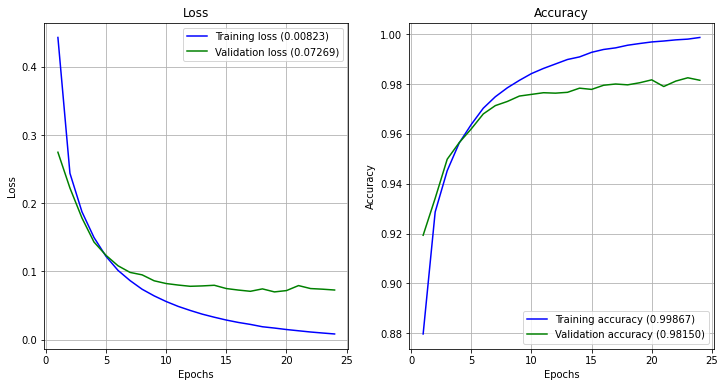

Accuracy train:  99.73%
Accuracy test:   98.21%
Confusion matrix, without normalization


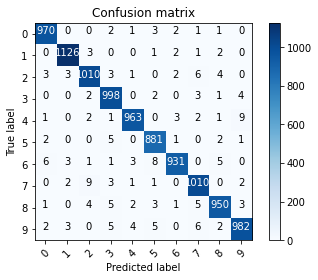

In [11]:
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(500, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=['accuracy'])
model.summary()

#Gráficas
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=35,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

Se observa que en la gráfica ocurre lo explicado anteriormente. Además de que también ocurre lo que se ha explicado de que accuracy train sale casi perfecto.

**5.   Modificación de la red anterior utilizando técnicas para evitar**

A continuación se soluciona con aplicando dropout entre la capa oculta y la de salida. 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               392500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
422/422 [==============================] - 6s 13ms/step - loss: 0.4876 - accuracy: 0.8607 - val_loss: 0.2902 - val_accuracy: 0.9128
Epoch 2/35
422/422 [==============================] - 5s 13ms/step - loss: 0.2672 - accuracy: 0.9203 - val_loss: 0.2225 - val_accuracy: 0.9358
Epoch 3/35
422/422 [======

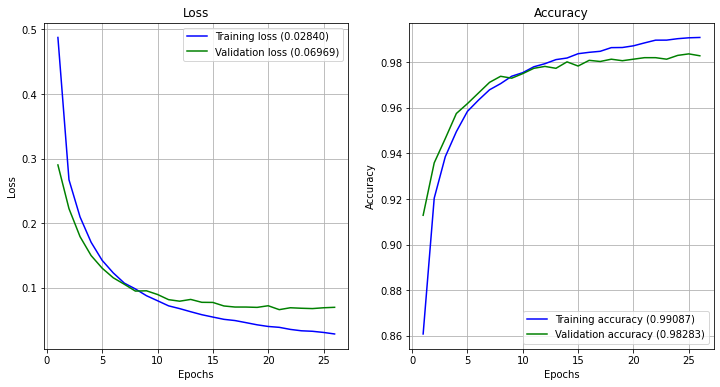

Accuracy train:  99.51%
Accuracy test:   98.11%
Confusion matrix, without normalization


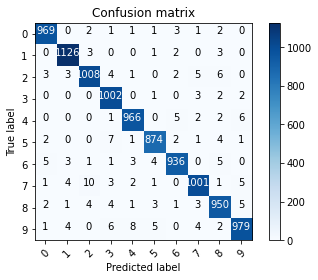

In [12]:
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(500, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=['accuracy'])
model.summary()

#Gráficas
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=35,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

Se observa como la gráfica mejora y el porcentaje de accuracy train baja un poco.

**6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso** 

Para **comparar las redes de una capa**, se ha obtado por probar distintas redes (todas con 10 neuronas en capa de salida) y cambiar el algoritmo y la función de salida. (Uno de las funciones de salida probadas es la lineal, para comprobar que efectivamente tiene para este caso muy malos resultados).

A continuación una tabla con las combinaciones:





| Tipo de red | Algoritmo | Función salida | Accuracy train | Accuracy test |
|:-----------:|:---------:|:--------------:|:--------------:|:-------------:|
|  Perceptrón |    Adam   |    sigmoidal   |      93.36     |     92.65     |
|  Perceptrón |    Adam   |     softmax    |      93.30     |     92.63     |
|  Perceptrón |    Adam   |     lineal     |      12.11     |     12.15     |
|  Perceptrón |    SGD    |    sigmoidal   |      90.05     |     90.75     |
|  Perceptrón |    SGD    |     softmax    |      90.16     |     90.85     |
|  Perceptrón |  RMSprop  |    sigmoidal   |      92.28     |     92.73     |
|  Perceptrón |  RMSprop  |     softmax    |      93.27     |     92.61     |

Para **comparar las redes de dos capas (2 CAPAS (1 CAPA OCULTA) - CAPA SALIDA 10 NEURONAS - FUNCIÓN SALIDA sigmoidal - ALGORITMO ADAM - FUNCIÓN CAPA OCULTA RELU)**  se ha probado primero qué algoritmo funcionaba mejor con capas ocultas, y en este caso en este análisis ha salido mejor Adam, por lo que se ha utilizado para el resto de pruebas con capas ocultas.

También se puede observar en la tabla que se ha probado con distinto número de neuronas en la capa oculta. Se observa que a más neuronas, mejores resultados van saliendo, pero si hay demasiadas neuronas comienza a haber sobreajuste. Este sobreajuste se ha solucionado con dropout, y se ha llegado a la conclusión que si para un determinado número de neuronas hay que aplicar un dropout que elimina el sobreajuste pero las neuronas que quedan (al apagarse ese porcentaje aleatorio) son como si pusieras menos neuronas desde el principio, entonces es mejor poner menos neuronas. Esto se refleja en la tabla con el caso de 50 - 70 - 100, para 70 y 100 se consigue eliminar sobreajuste cuando dropout deja aproximadamente 50 neuronas, por lo que es mejor la de 50 (con dropout). Y la de 50 genera sobreajuste pero con dropout es mejor que las anteriores. 

Por esta razón se elige la red con capa oculta con 50 neuronas aplicando dropout. 

A continuación una tabla con las combinaciones:

| Algoritmo | Nº neuronas capa oculta | Accuracy train | Accuracy test | Dropout |                                     Observaciones                                     |
|:---------:|:-----------------------:|:--------------:|:-------------:|:-------:|:-------------------------------------------------------------------------------------:|
|    Adam   |            10           |      94.62     |     93.62     |         |                                                                                       |
|  RMSprop  |            10           |      94.11     |     93.44     |         |                                                                                       |
|           |                         |                |               |         |                                                                                       |
|    Adam   |            20           |      96.70     |     95.66     |         |                                                                                       |
|    Adam   |            40           |      92.72     |     97.13     |         |                                                                                       |
|    Adam   |            50           |      99.12     |     97.15     |         |      sobreajuste: gráfica  sube pero no mucho y se estanca + diferencia accuracy      |
|    Adam   |            50           |      98.46     |     97.04     |   0.2   |                       arreglado sobreajuste, gráfica mucho mejor                      |
|    Adam   |            70           |      99.46     |     94.63     |         |            sobreajuste -> gráfica  sube pero no mucho + diferencia accuracy           |
|    Adam   |            70           |      98.56     |     96.97     |   0.3   | arreglado sobreajuste, gráfica mucho mejor, pero mejor la de 50 que la de 100 con 0.3 |
|    Adam   |           100           |      99.56     |     97.64     |         |            sobreajuste -> gráfica  sube pero no mucho + diferencia accuracy           |
|    Adam   |           100           |      98.63     |     97.03     |   0.5   | arreglado sobreajuste, gráfica mucho mejor, pero mejor la de 50 que la de 100 con 0.5 |

Para **comparar las redes de tres capas (3 CAPAS (2 CAPA OCULTA) - CAPA SALIDA 10 NEURONAS - FUNCIÓN SALIDA SIGMOIDAL - ALGORITMO ADAM - FUNCIÓN CAPA OCULTA RELU)** se han realizado distintas configuraciones para las pruebas, teniendo en cuenta la información de las redes de una y dos capas. Por esta razón se ha probado con más y menos número de neuronas en los distintos niveles de las capas, observando que es mejor ir de mayor a menor número de neuronas, terminando con menor número de neuronas en la capa de salida. 

A continuación una tabla con las combinaciones:

| Algoritmo | Nº neuronas capa oculta 1 | Nº neuronas capa oculta 2 | Accuracy train | Accuracy test |                   Dropout                   |                                Observaciones                                |
|:---------:|:-------------------------:|:-------------------------:|:--------------:|:-------------:|:-------------------------------------------:|:---------------------------------------------------------------------------:|
|    Adam   |             10            |             10            |      94.78     |     94.07     |                                             |                                                                             |
|    Adam   |             50            |             10            |      98.72     |     97.03     |                                             |                                                                             |
|    Adam   |             10            |             50            |      95.96     |     94.68     |                                             |                                                                             |
|    Adam   |            100            |             50            |      99.41     |     97.63     |                                             |                    sobreajuste - early stopping  epoch 13                   |
|    Adam   |            100            |             50            |      99.50     |     97.97     |      0.2 solo entre las dos capas ocultas      | mejora sobreajuste  en gráfica pero early stopping epoch 20, cuando termina |
|    Adam   |            100            |             50            |      99.38     |     97.84     | 0.2 entre capas ocultas y entre capa salida |  mejora sobreajuste gráfica, se ajusta más a train y no hay early stopping  |




**7.   Ejemplo de imagen mal clasificada por la red que mejor se comporte**

La red que mejor se comporta es la red de tres capas. (model_3, y_pred_3)

Como se puede ver en la matriz, un ejemplo de imagen mal clasificada sería las dos veces que predice un 1 y en realidad es un 9. Otro ejemplo sería cuando predice en 10 ocasiones que es un 4 cuando realmente es un 9.